# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
results_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
print(results_df.shape)
results_df.head()

(1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = results_df['Mouse ID'].nunique()
print(mice_count)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_row_df = results_df[results_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print("Duplicate rows by Mouse ID and Timepoint:")
duplicate_row_df

Duplicate rows by Mouse ID and Timepoint:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = duplicate_row_df['Mouse ID'].unique()
print("Duplicate Mouse IDs:")
print(duplicate_mice)

Duplicate Mouse IDs:
['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID.True for the mice in duplicate_mice
bad_mouse_row_filter_series = results_df['Mouse ID'].isin(duplicate_mice)
results_df[bad_mouse_row_filter_series]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = results_df[~bad_mouse_row_filter_series]
print(cleaned_df.shape)
cleaned_df.head()

(1880, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame. 
clean_mice_count = cleaned_df['Mouse ID'].nunique()
print(clean_mice_count)

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_gb = results_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
means = drug_gb.mean()
median = drug_gb.me
variance = drug_gb
# Assemble the resulting series into a single summary DataFrame.display(summary_stats)



In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
agg_funcs = {'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem'] }
summary_stats = results_df.groupby('Drug Regimen').agg(agg_funcs)
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.322552  50.854632  42.351070           6.507770   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.512884  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

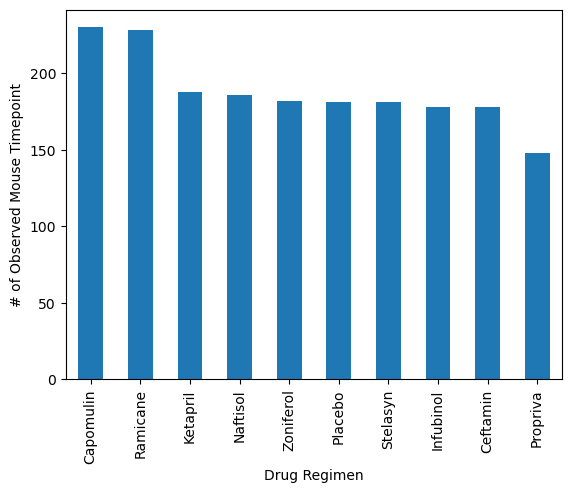

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoint')
plt.show()

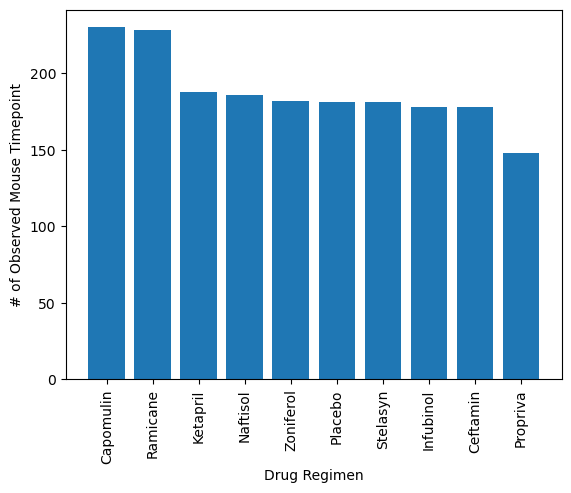

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()
x = np.arange(len(drug_regimen_counts))
plt.bar(x, drug_regimen_counts)
plt.xticks(x, drug_regimen_counts.index, rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoint')
plt.show()

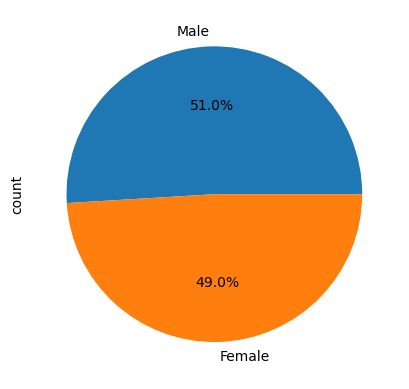

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = cleaned_df['Sex'].value_counts()
sex_count.plot.pie(autopct="%1.1f%%")
plt.show()

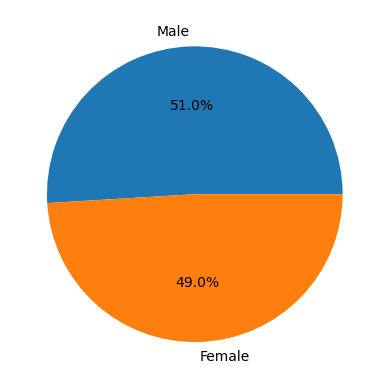

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = cleaned_df['Sex'].value_counts()
labels = sex_count.index
sizes = sex_count.values
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

### Analyzing final tumor volume of each mouse across four of the most promising treatment regimens

In [52]:
# Get a dataframe consisting ONLY of the FINAL (greatest ) timepoint for each mouse
# 1.  Start by getting a dataframe containing the MOUSE ID and the the last (greatest) timepoint for each mouse
final_timepoint_df = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# 2.  Merge the df from #1 with the cleaned DataFrame to get the tumor volume at the last timepoint
final_df = pd.merge(final_timepoint_df, cleaned_df, on=['Mouse ID','Timepoint'])
final_df =final_df.rename(columns={'Timepoint': 'Final Timepoint'})
final_df

,Mouse ID,Final Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
promising_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
potential_outliers = []

for drug in promising_drugs:
    # Locate the rows which contain mice on this drug
    drug_data = final_df[final_df['Drug Regimen'] == drug]

    # Get the tumor volumes as a series for this drug
    tumor_volumes = drug_data['Tumor Volume (mm3)']

    # Add the series to drug_tumor_volumes
    potential_outliers.append(tumor_volumes)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # Determine outliers using upper and lower bounds
    outliers = drug_data[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]['Tumor Volume (mm3)']
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


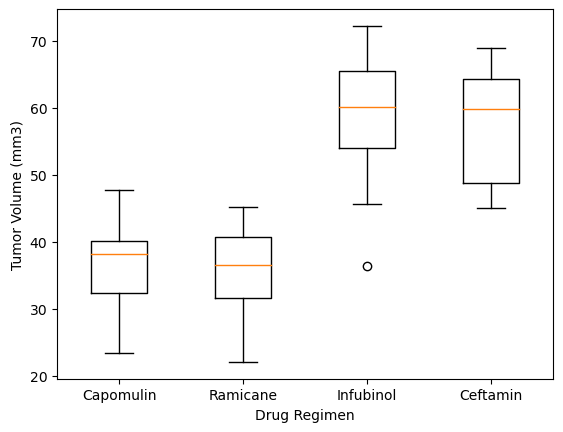

In [44]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# List of promising drugs
promising_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for each drug
tumor_volume_data = []

# For each promising drug
for drug in promising_drugs:
    # Locate the rows which contain mice on this drug and get the tumor volumes as a series
    drug_data = final_df[final_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_volume_data.append(drug_data)
plt.boxplot(tumor_volume_data, labels=promising_drugs)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

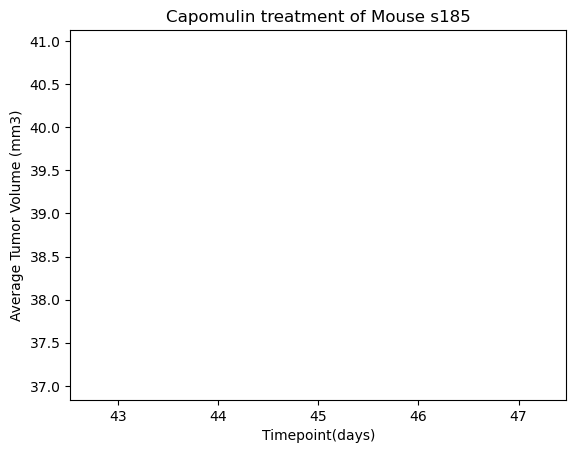

<Figure size 1000x600 with 0 Axes>

In [56]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "b128"
# mouse_data = final_df[(final_df['Mouse ID'] == mouse_id) & (final_df['Drug Regimen'] == 'Capomulin')]
mouse_data = final_df.loc[final_df['Mouse ID']==mouse_id]
x_value = mouse_data['Final Timepoint']
y_values = mouse_data['Tumor Volume (mm3)']
plt.plot(x_value, y_values)
plt.xlabel('Timepoint(days)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin treatment of Mouse s185')
plt.figure(figsize=(10, 6))
plt.show

In [53]:
print(final_df)

    Mouse ID  Final Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203               45    Infubinol  Female          20          23   
1       a251               45    Infubinol  Female          21          25   
2       a262               45      Placebo  Female          17          29   
3       a275               45     Ceftamin  Female          20          28   
4       a366               30     Stelasyn  Female          16          29   
..       ...              ...          ...     ...         ...         ...   
243     z435               10     Propriva  Female          12          26   
244     z578               45     Ramicane    Male          11          16   
245     z581               45    Infubinol  Female          24          25   
246     z795               45     Naftisol  Female          13          29   
247     z969               45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.97

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight = final_df['Weight (g)'].
for x in x_axis:
    times.append(x * x + np.random.randint(0, np.ceil(max(x_axis))))
plt.xlabel("")
plt.ylabel(")

plt.scatter(x_axis, times, marker="o", )
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
sin = np.sin(x_axis)
cos = np.cos(x_axis)
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
